# Data analysis in Python

Data often naturally comes in the form of a table. We might have, for instance, a survey of countries with their populations and gross domestic products (GDPs). We could store these as lists:

    countries = ["United States", "Australia", ...]
    populations = [326687501, 24982688, ...]
    gdps = [20953030000000, 1327836171068.51, ...]
    
...but this makes it cumbersome to perform some operations. For instance, what if we wanted to remove a country from the list, or reorder the countries? We would have to manually apply the appropriate operations to all of the columns in our table.

Fortunately, there is a Python package that makes working with tabular data a breeze: it is called Pandas (https://pandas.pydata.org/). In the following, we will install Pandas and look at some basic ways to use it.

### Installing Pandas

Open up a terminal and run the following commands:

    % conda activate nsbp-2022
    % conda install pandas

Remember to confirm when asked whether to proceed.

Let us now import pandas. The conventional way to do so is:

In [1]:
import pandas as pd

### Pandas basic usage

We included a table of country populations and GDPs in this repository, in a `.csv` format – that stands for "comma separated values". Indeed, the file contains values separated by commas on multiple lines:

In [2]:
!head data/country_indicators.csv

Country Name,Country Code,Population,GDP
Afghanistan,AFG,37172386,20116137325.8206
Albania,ALB,2866376,14887629268.2927
Algeria,DZA,42228429,145009181490.62
American Samoa,ASM,55465,709000000.0
Angola,AGO,30809762,58375976292.9678
Antigua and Barbuda,ATG,96286,1370281481.48148
Argentina,ARG,44494502,389288056265.325
Armenia,ARM,2951776,12641209802.112
Australia,AUS,24982688,1327836171068.51


Note how the first line contains a header indicating what each column means. We can easily load this into Python using Pandas:

In [3]:
df = pd.read_csv("data/country_indicators.csv")
df

,Country Name,Country Code,Population,GDP
0,Afghanistan,AFG,37172386,2.011614e+10
1,Albania,ALB,2866376,1.488763e+10
2,Algeria,DZA,42228429,1.450092e+11
3,American Samoa,ASM,55465,7.090000e+08
4,Angola,AGO,30809762,5.837598e+10
...,...,...,...,...
162,Uruguay,URY,3449299,5.362883e+10
163,Uzbekistan,UZB,32955400,5.992995e+10
164,Vanuatu,VUT,292680,8.815479e+08
165,Zambia,ZMB,17351822,1.811063e+10


The object that was created by the call to `pd.read_csv` is a *data frame* (hence the name `df`). As you can see, the data frame is basically a table: it has a set of columns, all of the same length, and data in each column. Each column typically has a fixed data type, but different columns can hold different types: all populations are integer, all GDPs are `float`, and all country names and codes are strings. In addition to this, a data frame also has an index – the integer on the left in the table above. The index allows us to select a row of the table. Currently the index is simply a numerical variable indicating the row index (zero-based, as always in Python), but we can change this to be something more useful, like the country name:

In [4]:
df.set_index("Country Name")

,Country Code,Population,GDP
Country Name,,,
Afghanistan,AFG,37172386,2.011614e+10
Albania,ALB,2866376,1.488763e+10
Algeria,DZA,42228429,1.450092e+11
American Samoa,ASM,55465,7.090000e+08
Angola,AGO,30809762,5.837598e+10
...,...,...,...
Uruguay,URY,3449299,5.362883e+10
Uzbekistan,UZB,32955400,5.992995e+10
Vanuatu,VUT,292680,8.815479e+08


There's an important subtlety to notice here: `set_index`, like most Pandas methods, returns a *new* data frame instead of changing the old one:

In [5]:
df

,Country Name,Country Code,Population,GDP
0,Afghanistan,AFG,37172386,2.011614e+10
1,Albania,ALB,2866376,1.488763e+10
2,Algeria,DZA,42228429,1.450092e+11
3,American Samoa,ASM,55465,7.090000e+08
4,Angola,AGO,30809762,5.837598e+10
...,...,...,...,...
162,Uruguay,URY,3449299,5.362883e+10
163,Uzbekistan,UZB,32955400,5.992995e+10
164,Vanuatu,VUT,292680,8.815479e+08
165,Zambia,ZMB,17351822,1.811063e+10


If we want to change the data frame, we can do so by assigning the result back to `df`, or by using the `inplace` argument:

In [6]:
df.set_index("Country Name", inplace=True)
df

,Country Code,Population,GDP
Country Name,,,
Afghanistan,AFG,37172386,2.011614e+10
Albania,ALB,2866376,1.488763e+10
Algeria,DZA,42228429,1.450092e+11
American Samoa,ASM,55465,7.090000e+08
Angola,AGO,30809762,5.837598e+10
...,...,...,...
Uruguay,URY,3449299,5.362883e+10
Uzbekistan,UZB,32955400,5.992995e+10
Vanuatu,VUT,292680,8.815479e+08


We can access a single column in a data frame using square brackets:

In [7]:
df["Country Code"]

Country Name
Afghanistan       AFG
Albania           ALB
Algeria           DZA
American Samoa    ASM
Angola            AGO
                 ... 
Uruguay           URY
Uzbekistan        UZB
Vanuatu           VUT
Zambia            ZMB
Zimbabwe          ZWE
Name: Country Code, Length: 167, dtype: object

If the column name is a valid Python identifier (roughly, it contains no spaces and doesn't start with a number), the same can be done using a dot `.`:

In [8]:
df.Population

Country Name
Afghanistan       37172386
Albania            2866376
Algeria           42228429
American Samoa       55465
Angola            30809762
                    ...   
Uruguay            3449299
Uzbekistan        32955400
Vanuatu             292680
Zambia            17351822
Zimbabwe          14439018
Name: Population, Length: 167, dtype: int64

Each column in a data frame is a `Series`. A `Series` object is similar to a Numpy array (and Pandas is in fact built on top of Numpy), but it has two additional features: an index and (optionally) a name.

In [9]:
type(df.Population)

pandas.core.series.Series

Pandas data frames and series implement a variety of useful operations. We can, for instance, estimate the world population according to our dataset like this:

In [10]:
# Remember the format string described on Tuesday; see 2_python_intro.ipynb.
# 1e9 is a convenient way of writing 10 to the power of 9, i.e., a billion.
# :.3 in the format string indicates that the result should be displayed with 3
# significant digits.
print(f"World population is {df.Population.sum() / 1e9:.3} billion.")
print(f"World GDP {df.GDP.sum() / 1e12:.3} trillion dollars.")

World population is 6.9 billion.
World GDP 80.3 trillion dollars.


We can also generate new columns:

In [11]:
df["GDP per capita"] = df.GDP / df.Population
df

,Country Code,Population,GDP,GDP per capita
Country Name,,,,
Afghanistan,AFG,37172386,2.011614e+10,541.158088
Albania,ALB,2866376,1.488763e+10,5193.885683
Algeria,DZA,42228429,1.450092e+11,3433.923187
American Samoa,ASM,55465,7.090000e+08,12782.836023
Angola,AGO,30809762,5.837598e+10,1894.723377
...,...,...,...,...
Uruguay,URY,3449299,5.362883e+10,15547.746786
Uzbekistan,UZB,32955400,5.992995e+10,1818.516878
Vanuatu,VUT,292680,8.815479e+08,3011.985543


In [12]:
print(f"Median GDP per-capita ${df['GDP per capita'].median():.2f}.")

Median GDP per-capita $6315.07.


## A more complex example: COVID-19 data

Let us look at more Pandas features. One cool thing that Pandas can do is load files from remote sources without having to worry about downloading them first:

In [13]:
base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/"
url = base_url + "time_series_covid19_deaths_global.csv"
covid = pd.read_csv(url).set_index("Country/Region")
covid

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,5/23/22,5/24/22,5/25/22,5/26/22,5/27/22,5/28/22,5/29/22,5/30/22,5/31/22,6/1/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,33.939110,67.709953,0,0,0,0,0,0,0,...,7698,7698,7699,7699,7699,7701,7701,7701,7705,7708
Albania,NaN,41.153300,20.168300,0,0,0,0,0,0,0,...,3497,3497,3497,3497,3497,3497,3497,3497,3497,3497
Algeria,NaN,28.033900,1.659600,0,0,0,0,0,0,0,...,6875,6875,6875,6875,6875,6875,6875,6875,6875,6875
Andorra,NaN,42.506300,1.521800,0,0,0,0,0,0,0,...,153,153,153,153,153,153,153,153,153,153
Angola,NaN,-11.202700,17.873900,0,0,0,0,0,0,0,...,1900,1900,1900,1900,1900,1900,1900,1900,1900,1900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,NaN,31.952200,35.233200,0,0,0,0,0,0,0,...,5660,5660,5660,5660,5660,5660,5660,5660,5660,5660
Winter Olympics 2022,NaN,39.904200,116.407400,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yemen,NaN,15.552727,48.516388,0,0,0,0,0,0,0,...,2149,2149,2149,2149,2149,2149,2149,2149,2149,2149


This just loaded the history of COVID-19 deaths, by country, as reported by Johns Hopkins University. Let us drop the province and lat/long columns, which we don't care about at this point:

In [14]:
covid = covid.drop(["Province/State", "Lat", "Long"], axis="columns")

Now we look at the statistics for the United States:

In [15]:
covid.loc["US"]

1/22/20          0
1/23/20          0
1/24/20          0
1/25/20          0
1/26/20          0
            ...   
5/28/22    1006614
5/29/22    1006621
5/30/22    1006648
5/31/22    1007032
6/1/22     1007719
Name: US, Length: 862, dtype: int64

Let's try to plot this!

In [16]:
import matplotlib.pyplot as plt

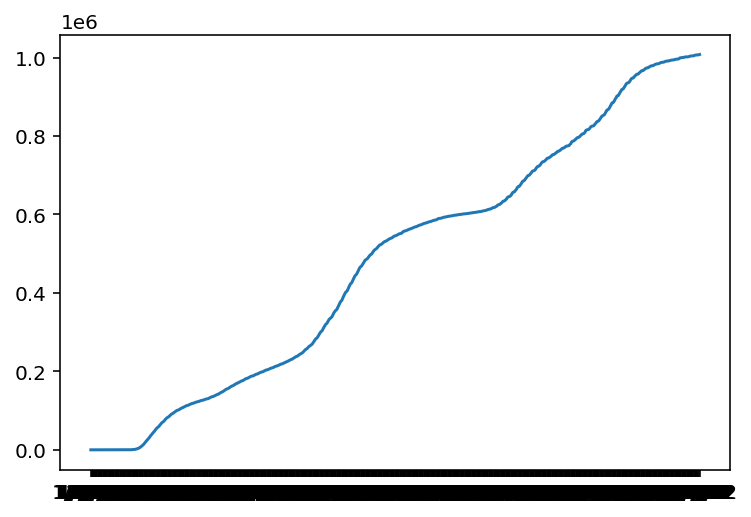

In [17]:
plt.plot(covid.loc["US"])

Hmmm... What happened with the labels? looks like there are a lot of labels on top of each other. Well, it turns out that the date (which is now the index for `covid.loc["US"]`) is not a numeric data type, but string (here shown as `dtype='object'`):

In [18]:
covid.loc["US"].index

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '5/23/22', '5/24/22', '5/25/22', '5/26/22', '5/27/22', '5/28/22',
       '5/29/22', '5/30/22', '5/31/22', '6/1/22'],
      dtype='object', length=862)

Matplotlib doesn't know what to do with strings, so it thinks of the data as categorical: one data point for each date. It thus tries to display a tick and a tick label for each date, leading to a mess. What we can do is convert the index to actual dates:

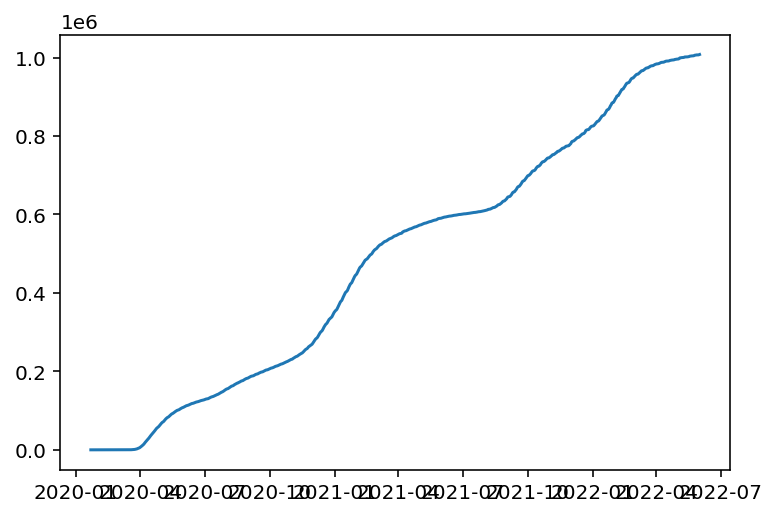

In [19]:
us_data = covid.loc["US"]
us_data.index = pd.to_datetime(us_data.index)
plt.plot(us_data)

Turns out that Matplotlib knows about dates and formats them accordingly – if imperfectly. We can do a bit better like this:

Text(0, 0.5, 'cumulative deaths')

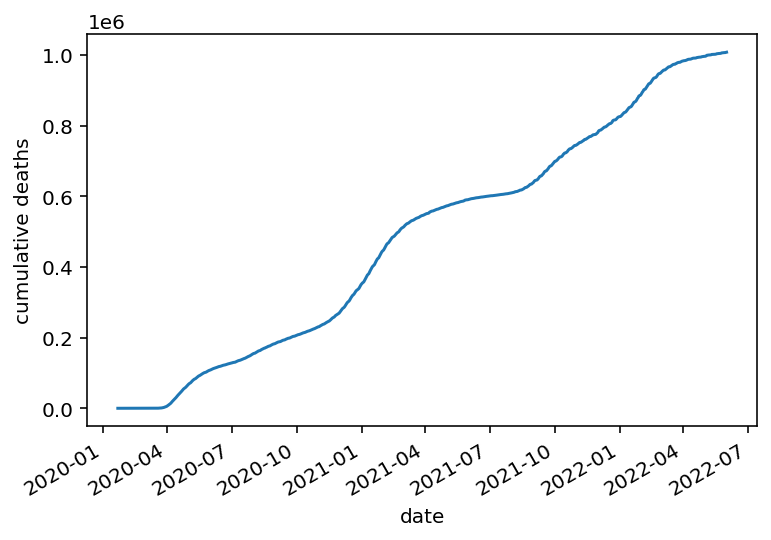

In [20]:
plt.plot(us_data)
# plt.gcf() is a handle for the current figure
# autofmt_xdate() adjusts the formatting of the x labels to better fit date data
plt.gcf().autofmt_xdate()

plt.xlabel("date")
plt.ylabel("cumulative deaths")

We can also compare several countries:

<AxesSubplot:>

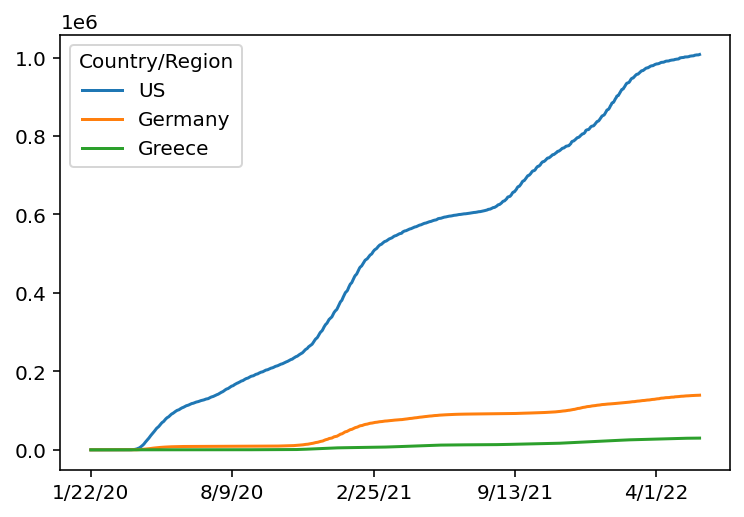

In [21]:
covid.loc[["US", "Germany", "Greece"]].transpose().plot()

Note how Pandas data frames have convenient built-in plotting facilities. These just call Matplotlib functions by default and they're great for exploratory work. You might need to use Matplotlib manually for more customization, though.

One of the most powerful operations you can do with data frames is a *join*. Joining two data frames allows you to combine their information according to a common index. Let us combine the COVID data with the population data to see if we can get information on the number of deaths per capita:

In [22]:
combined = covid.join(df, how="inner")
combined

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/27/22,5/28/22,5/29/22,5/30/22,5/31/22,6/1/22,Country Code,Population,GDP,GDP per capita
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,7699,7701,7701,7701,7705,7708,AFG,37172386,2.011614e+10,541.158088
Albania,0,0,0,0,0,0,0,0,0,0,...,3497,3497,3497,3497,3497,3497,ALB,2866376,1.488763e+10,5193.885683
Algeria,0,0,0,0,0,0,0,0,0,0,...,6875,6875,6875,6875,6875,6875,DZA,42228429,1.450092e+11,3433.923187
Angola,0,0,0,0,0,0,0,0,0,0,...,1900,1900,1900,1900,1900,1900,AGO,30809762,5.837598e+10,1894.723377
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,138,138,138,138,138,138,ATG,96286,1.370281e+09,14231.367815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,0,0,0,0,0,0,0,0,0,0,...,7227,7227,7227,7227,7238,7238,URY,3449299,5.362883e+10,15547.746786
Uzbekistan,0,0,0,0,0,0,0,0,0,0,...,1637,1637,1637,1637,1637,1637,UZB,32955400,5.992995e+10,1818.516878
Vanuatu,0,0,0,0,0,0,0,0,0,0,...,14,14,14,14,14,14,VUT,292680,8.815479e+08,3011.985543
Zambia,0,0,0,0,0,0,0,0,0,0,...,3985,3985,3985,3985,3987,3987,ZMB,17351822,1.811063e+10,1043.730817


Notice how the population and GDP data was pulled in with the COVID data, matching by the indices in the two data frames, which correspond to country names. We used an "inner" join here – meaning we keep only those countries that appear in both data frames. Other kinds of join are "outer" (keep all the values that appear in either of the data frame's indices), "left" (keep only the ones in the first data frame), or "right" (keep only the ones in the second data frame).

Interesting observation: there are more rows here than in `df`! How is that possible, if we don't keep any countries that don't appear in `df`? The answer is that the COVID-19 dataset contains some countries multiple times, in those cases where information for several different provinces is available. The duplicated country names can actually be a hassle, so let's take care of them:

In [23]:
combined = combined.loc[~combined.index.duplicated()]

Note that this is an overly simplistic solution: we're simply removing duplicated countries altogether. This gets rid of things like France, Australia, and Canada! Can you think of a better way? *Hint: the Province/State field that we removed above can be used to select only the country-wide values and remove the per-province ones.*

Now that we have the combined data frame, how do we get the per-capita death rates?

In [24]:
# you can use underscores in numbers to make it easier to read if they have many digits
# the underscores are ignored by Python
deaths_per_100k = combined.iloc[:, :-4].divide(combined.Population, axis=0) * 100_000
deaths_per_100k

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/23/22,5/24/22,5/25/22,5/26/22,5/27/22,5/28/22,5/29/22,5/30/22,5/31/22,6/1/22
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.708921,20.708921,20.711611,20.711611,20.711611,20.716991,20.716991,20.716991,20.727752,20.735823
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,122.000742,122.000742,122.000742,122.000742,122.000742,122.000742,122.000742,122.000742,122.000742,122.000742
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.280501,16.280501,16.280501,16.280501,16.280501,16.280501,16.280501,16.280501,16.280501,16.280501
Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.166877,6.166877,6.166877,6.166877,6.166877,6.166877,6.166877,6.166877,6.166877,6.166877
Antigua and Barbuda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,143.323017,143.323017,143.323017,143.323017,143.323017,143.323017,143.323017,143.323017,143.323017,143.323017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,209.172936,209.520833,209.520833,209.520833,209.520833,209.520833,209.520833,209.520833,209.839738,209.839738
Uzbekistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.967319,4.967319,4.967319,4.967319,4.967319,4.967319,4.967319,4.967319,4.967319,4.967319
Vanuatu,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.783381,4.783381,4.783381,4.783381,4.783381,4.783381,4.783381,4.783381,4.783381,4.783381
Zambia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,22.965888,22.965888,22.965888,22.965888,22.965888,22.965888,22.965888,22.965888,22.977414,22.977414


<AxesSubplot:>

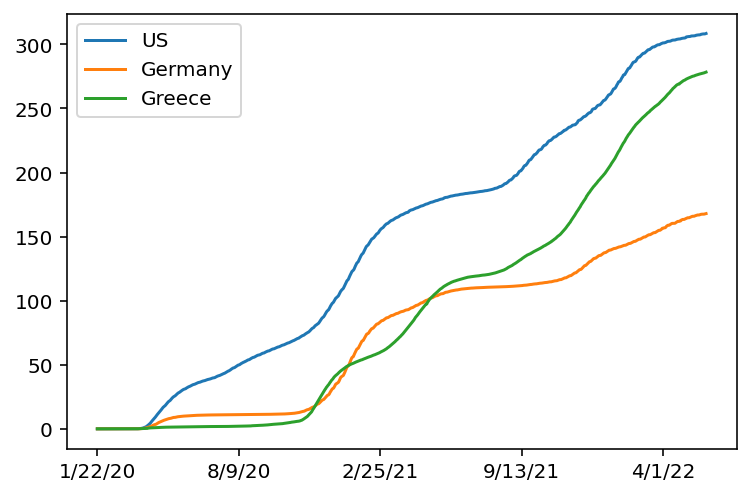

In [25]:
deaths_per_100k.loc[["US", "Germany", "Greece"]].transpose().plot()

What if we wanted to see daily values? We could use `diff`:

Text(0, 0.5, 'deaths per day per 100k')

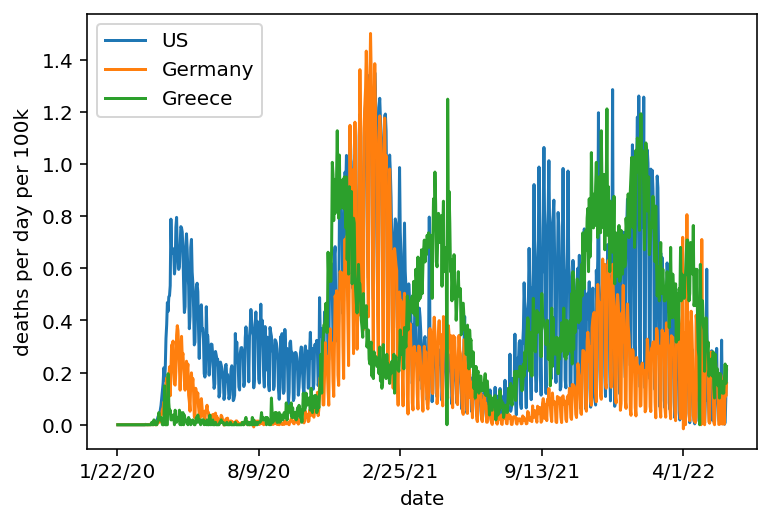

In [26]:
deaths_per_100k.loc[["US", "Germany", "Greece"]].transpose().diff().plot()
plt.xlabel("date")
plt.ylabel("deaths per day per 100k")

## Conclusion

This brief introduction into Pandas should be enough to get you started. To learn more, remember Google, Stackoverflow, and the Pandas documentation pages (which you can find using Google).